In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#1	Duration	          22	Is_guest_login
#2	Protocol_type	      23	Count
#3	Service	            24	Serror_rate
#4	Src_bytes	          25	Rerror_rate
#5	Dst_bytes	          26	Same_srv_rate
#6	Flag	              27	Diff_srv_rate
#7	Land	              28	Srv_count
#8	Wrong_fragment	    29	Srv_serror_rate
#9	Urgent	            30	Srv_rerror_rate
#10	Hot	                31	Srv_diff_host_rate
#11	Num_failed_logins	  32	Dst_host_count
#12	Logged_in	          33	Dst_host_srv_count
#13	Num_compromised	    34	Dst_host_same_srv_rate
#14	Root_shell	        35	Dst_host_diff_srv_rate
#15	Su_attempted	      36	Dst_host_same_src_port_rate
#17	Num_file_creations	38	Dst_host_serror_rate
#18	Num_shells	        39	Dst_host_srv_serror_rate
#19	Num_access_files	  40	Dst_host_rerror_rate
#20	Num_outbound_cmds	  41	Dst_host_srv_rerror_rate
#21	Is_hot_login	      42	class

In [1]:
import numpy as np
import pandas as pd
import random as rnd
import csv
import random
import math
import operator
from tabulate import tabulate
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import datasets, neighbors, linear_model, tree
from pandas import read_csv
import seaborn as sns
from numpy import set_printoptions
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SNS5_full.csv',header = None)

#DATA PRE-PROCCESSING

In [ ]:
df.shape

(4898431, 42)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

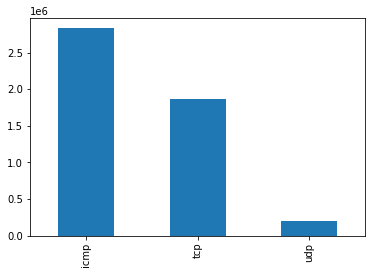

In [ ]:
bar_graph(1)

<Figure size 1080x216 with 0 Axes>

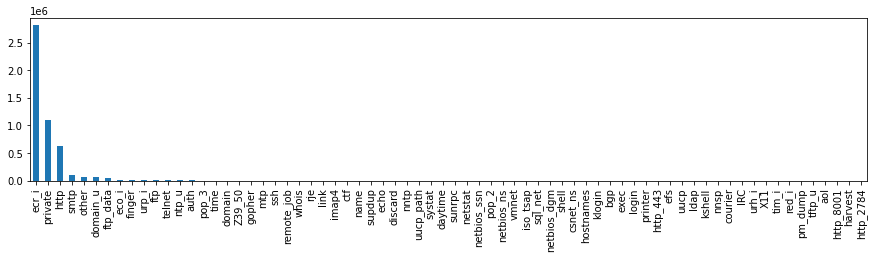

In [ ]:
plt.figure(figsize=(15,3))
bar_graph(2)

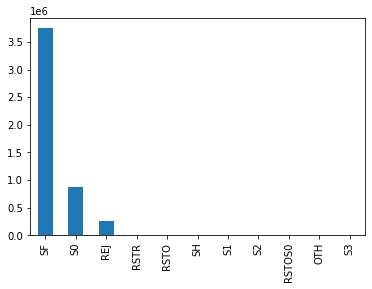

In [ ]:
bar_graph(3)

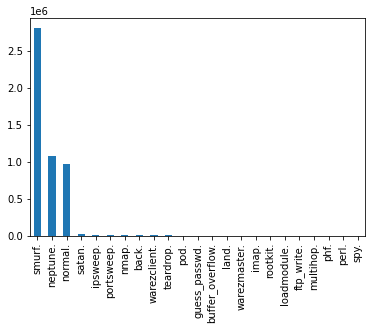

In [ ]:
bar_graph(41)

<Figure size 1080x864 with 0 Axes>

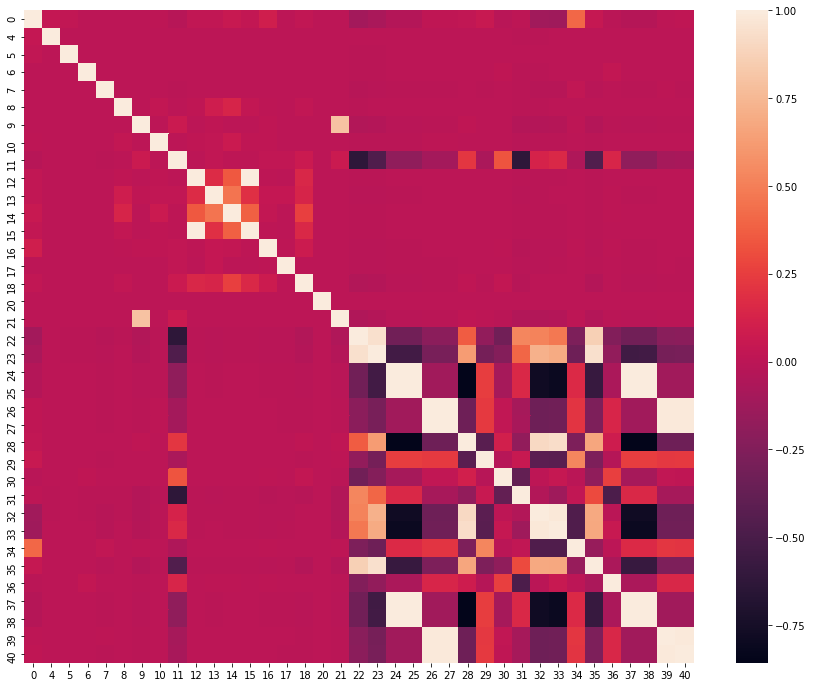

In [ ]:
df = df[[col for col in df if df[col].nunique() > 1]]

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

***From above we can conclude that two feature are high correlated if their repective column is white. Based on this thoery we have tried to find the correlation of these columns by looking at the above graph.***

In [ ]:
print(df[15].corr(df[12]))
print(df[39].corr(df[40]))

0.9975798933487886
0.9869790678087113


In [ ]:
print(df[37].corr(df[38]))
print(df[33].corr(df[32]))

0.9982859559765034
0.9788464524219127


In [ ]:
print(df[26].corr(df[40]))
print(df[27].corr(df[40]))
print(df[39].corr(df[26]))
print(df[39].corr(df[27]))

0.9859781723137269
0.9879088754808458
0.9897555886507504
0.9855530624565038


In [ ]:
print(df[24].corr(df[37]))
print(df[25].corr(df[37]))
print(df[24].corr(df[38]))
print(df[25].corr(df[38]))

0.9990059376726664
0.9979417182535862
0.9982509415920111
0.9993917300375501


In [ ]:
print(df[23].corr(df[35]))
print(df[28].corr(df[33]))
print(df[22].corr(df[23]))

0.9473596471555557
0.9316213679068658
0.9433902218807168


In [ ]:
print(df[26].corr(df[27]))
print(df[24].corr(df[25]))

0.9953719458067455
0.9986924138661805


***As can be seen above, we were not accurate in all the cases but we could see some columns are highly correlated with other as their value is more than .98 , so we could drop these columns.***

In [ ]:
df.drop(24,axis = 1,inplace = True)
df.drop(25,axis = 1,inplace = True)
df.drop(26,axis = 1,inplace = True)
df.drop(27,axis = 1,inplace = True)
df.drop(12,axis = 1,inplace = True)
df.drop(15,axis = 1,inplace = True)
df.drop(32,axis = 1,inplace = True)
df.drop(33,axis = 1,inplace = True)
df.drop(37,axis = 1,inplace = True)
df.drop(38,axis = 1,inplace = True)
df.drop(39,axis = 1,inplace = True)
df.drop(40,axis = 1,inplace = True)

<Figure size 1080x864 with 0 Axes>

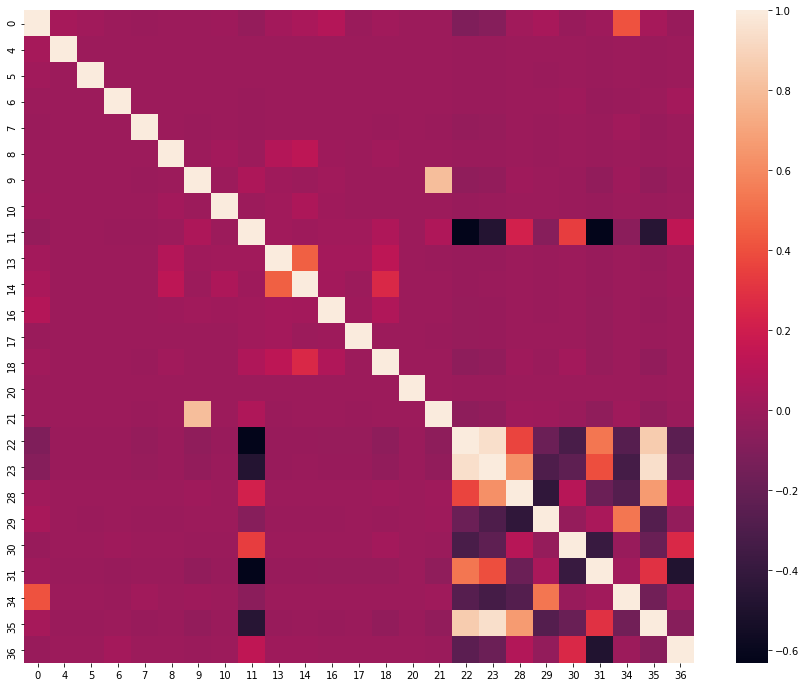

In [ ]:
df = df[[col for col in df if df[col].nunique() > 1]]

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [ ]:
df[1].value_counts()
df[2].value_counts()
df[3].value_counts()

icmp    2833545
tcp     1870598
udp      194288
Name: 1, dtype: int64

ecr_i        2811660
private      1100831
http          623091
smtp           96554
other          72653
              ...   
tftp_u             3
aol                2
http_8001          2
harvest            2
http_2784          1
Name: 2, Length: 70, dtype: int64

SF        3744328
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: 3, dtype: int64

In [ ]:
df[1].replace({'icmp': 0, 'tcp': 1, 'udp' : 2}, inplace=True)
df[2].replace({'http':1, 'smtp':2, 'domain_u':3, 'auth':4, 'finger':5, 'telnet':6, 'eco_i':7,
               'ftp':8, 'ntp_u':9, 'ecr_i':10, 'other':11, 'urp_i':12, 'private':13, 'pop_3':14,
               'ftp_data':15, 'netstat':16, 'daytime':17, 'ssh':18, 'echo':19, 'time':20,
               'name':21,'whois':22, 'domain':23, 'mtp':24, 'gopher':25, 'remote_job':26, 
               'rje':17, 'ctf':28,'supdup':29, 'link':30, 'systat':31, 'discard':32, 'X11':33, 
               'shell':34, 'login':35,'imap4':36, 'nntp':37, 'uucp':38, 'pm_dump':39, 'IRC':40, 
               'Z39_50':41, 'netbios_dgm':42,'ldap':43, 'sunrpc':44, 'courier':45, 'exec':46, 
               'bgp':47, 'csnet_ns':48, 'http_443':49,'klogin':50, 'printer':51, 'netbios_ssn':52, 
               'pop_2':53, 'nnsp':54, 'efs':55,'hostnames':56, 'uucp_path':57, 'sql_net':58, 
               'vmnet':59, 'iso_tsap':60,'netbios_ns':61, 'kshell':62, 'urh_i':63, 'http_2784':64, 
               'harvest':65, 'aol':66,'tftp_u':67, 'http_8001':68, 'tim_i':69, 'red_i':70}, inplace=True)
df[3].replace({'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'OTH':9,
               'S3':10}, inplace=True)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,13,14,16,17,18,20,21,22,23,28,29,30,31,34,35,36,41
0,0,1,1,0,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1.0,0.0,0.0,0,0.0,0.00,0.0,normal.
1,0,1,1,0,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1.0,0.0,0.0,1,0.0,1.00,0.0,normal.
2,0,1,1,0,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1.0,0.0,0.0,2,0.0,0.50,0.0,normal.
3,0,1,1,0,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1.0,0.0,0.0,3,0.0,0.33,0.0,normal.
4,0,1,1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,3,3,1.0,0.0,0.0,4,0.0,0.25,0.0,normal.


<Figure size 1080x864 with 0 Axes>

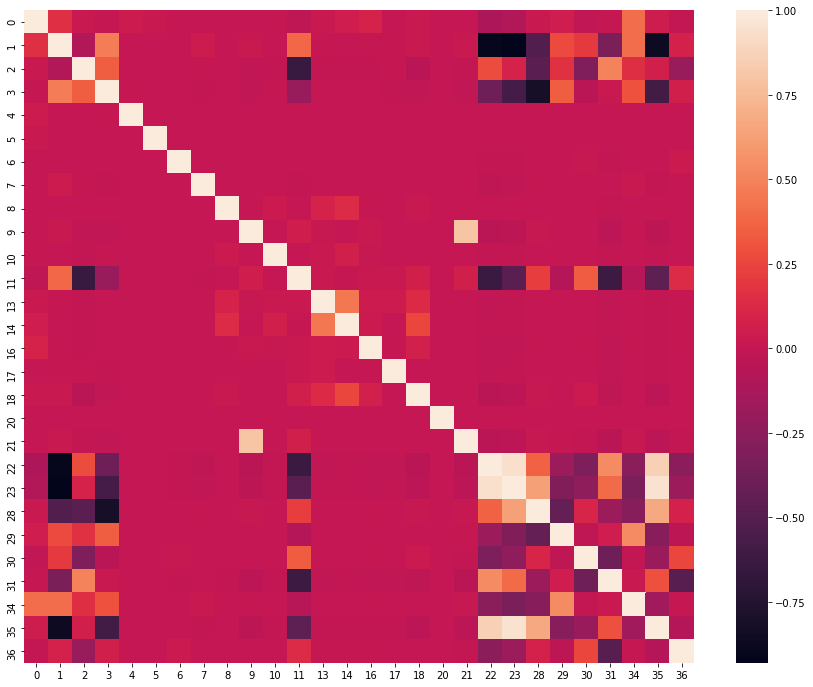

In [ ]:
corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [ ]:
df.shape

(4898431, 29)

MODELING

In [ ]:
# Target variable and train set
Y = df[[41]]
X = df.drop([41,], axis=1)

#sc = MinMaxScaler()
#X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(3428901, 28) (1469530, 28)
(3428901, 1) (1469530, 1)


#GAUSSIAN NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB()

In [ ]:
start_time = time.time()
modelGNB.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print("Training time: ",end_time-start_time)

GaussianNB(priors=None, var_smoothing=1e-09)

Training time:  12.162451028823853


In [ ]:
start_time = time.time()
Y_pred_GNB = modelGNB.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  6.424314975738525


In [ ]:
print(accuracy_score(Y_test,Y_pred_GNB))
print(precision_score(Y_test,Y_pred_GNB,average='weighted'))
print(recall_score(Y_test,Y_pred_GNB,average='weighted'))
print(f1_score(Y_test,Y_pred_GNB,average='weighted'))

0.8987968942450988
0.9717932892120493
0.8987968942450988
0.9181184212649331


#DECISION TREE

***Have tried to train this model of decision tree by tunning  variuos parameter like for criterion as "Entropy" , "Gini_Index" and max depth as 3,4,5. For this case we got best accuracy for criterion as "Entropy" and max depth as 5, so only presenting that.***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

In [ ]:
start_time = time.time()
modelDT.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print("Training time: ",end_time-start_time)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training time:  20.13712978363037


In [ ]:
start_time = time.time()
Y_pred_DT = modelDT.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  0.6757950782775879


In [ ]:
# Entropy , Max Depth = 5

print(accuracy_score(Y_test,Y_pred_DT))
print(precision_score(Y_test,Y_pred_DT,average='weighted'))
print(recall_score(Y_test,Y_pred_DT,average='weighted'))
print(f1_score(Y_test,Y_pred_DT,average='weighted'))

0.9959871523548346
0.9968629014054141
0.9959871523548346
0.9960794682911239


#RANDOM FOREST

***Have tried to train this Random forest model by tunning the number of tress of forest as 25,30,35,40 i.e. n_estimators and  have got best accuracy for n_estimators as 30, so only presenting that.***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(n_estimators=30)

In [ ]:
start_time = time.time()
modelRFC.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print("Training time: ",end_time-start_time)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training time:  167.53442907333374


In [ ]:
start_time = time.time()
Y_pred_RFC = modelRFC.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  10.313700914382935


In [ ]:
# No of trees in the forest is 30

print(accuracy_score(Y_test,Y_pred_RFC))
print(precision_score(Y_test,Y_pred_RFC,average='weighted'))
print(recall_score(Y_test,Y_pred_RFC,average='weighted'))
print(f1_score(Y_test,Y_pred_RFC,average='weighted'))

0.9999414778874879
0.9999340005272833
0.9999414778874879
0.9999367871983365


#Artificial Neural Network

In [ ]:
def fun():
    model = Sequential()
    
    #here 23 is output dimension
    model.add(Dense(23,input_dim = 28,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    model.add(Dense(23,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [ ]:
model_ANN = KerasClassifier(build_fn=fun,epochs=100,batch_size=256)

In [ ]:
start = time.time()
model_ANN.fit(X_train, Y_train.values.ravel())
end = time.time()

Epoch 1/100
3349/3349 [==============================] - 11s 3ms/step - loss: 1.9928 - accuracy: 0.7122
Epoch 2/100
3349/3349 [==============================] - 10s 3ms/step - loss: 0.5568 - accuracy: 0.8451
Epoch 3/100
3349/3349 [==============================] - 10s 3ms/step - loss: 0.2529 - accuracy: 0.9906
Epoch 4/100
3349/3349 [==============================] - 9s 3ms/step - loss: 0.1602 - accuracy: 0.9906
Epoch 5/100
3349/3349 [==============================] - 10s 3ms/step - loss: 0.1116 - accuracy: 0.9906
Epoch 6/100
3349/3349 [==============================] - 10s 3ms/step - loss: 0.0872 - accuracy: 0.9906
Epoch 7/100
3349/3349 [==============================] - 10s 3ms/step - loss: 0.0726 - accuracy: 0.9906
Epoch 8/100
3349/3349 [==============================] - 9s 3ms/step - loss: 0.0628 - accuracy: 0.9907
Epoch 9/100
3349/3349 [==============================] - 9s 3ms/step - loss: 0.0549 - accuracy: 0.9907
Epoch 10/100
3349/3349 [==============================] - 9s 3ms/st

In [ ]:
start_time = time.time()
Y_pred_ANN = model_ANN.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  3.3958234786987305


In [ ]:
# No of epochs are 100

print(accuracy_score(Y_test,Y_pred_ANN))
print(precision_score(Y_test,Y_pred_ANN,average='weighted'))
print(recall_score(Y_test,Y_pred_ANN,average='weighted'))
print(f1_score(Y_test,Y_pred_ANN,average='weighted'))

0.997891162480521
0.9965535599353518
0.997891162480521
0.9971900376076196


#Performance Comparison

In [3]:
from tabulate import tabulate
print(tabulate([['GAUSSIAN NAIVE BAYES','DECISION TREE','RANDOM FOREST', 'ARTIFICIAL NEURAL NETWORK'],
          ['accuracy_score',0.8987,0.9960,0.9999,0.9979],
          ['precision_score',0.9718,0.9969,0.9999,0.9965],
          ['recall_score',0.8988,0.9959,0.9999,0.9979],
          ['f1_score',0.9187,0.9961,0.9999,0.9972]],headers="firstrow"))

                   GAUSSIAN NAIVE BAYES    DECISION TREE    RANDOM FOREST    ARTIFICIAL NEURAL NETWORK
---------------  ----------------------  ---------------  ---------------  ---------------------------
accuracy_score                   0.8987           0.996            0.9999                       0.9979
precision_score                  0.9718           0.9969           0.9999                       0.9965
recall_score                     0.8988           0.9959           0.9999                       0.9979
f1_score                         0.9187           0.9961           0.9999                       0.9972


**We can observe from above that we are getting highest accuarcy in Random Forest model so we will be using Random forest model on the given test data to predict the output**

#Predict given test data

In [ ]:
T_df = pd.read_csv('/content/drive/MyDrive/SNS5_test.csv',header = None)

<Figure size 1080x864 with 0 Axes>

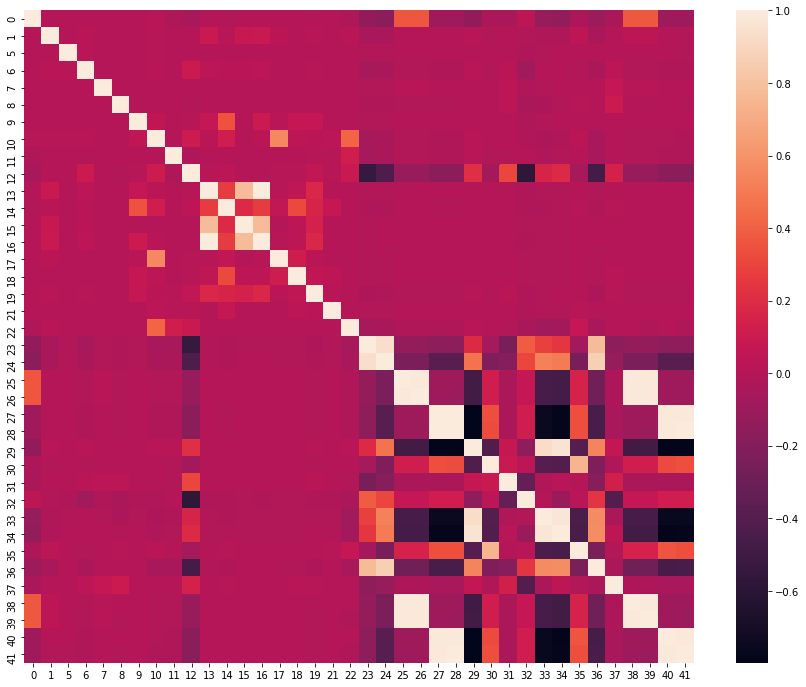

In [ ]:
T_df = T_df[[col for col in T_df if T_df[col].nunique() > 1]]

corr = T_df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [ ]:
T_df.drop(0,axis = 1,inplace = True)
T_df.drop(25,axis = 1,inplace = True)
T_df.drop(26,axis = 1,inplace = True)
T_df.drop(27,axis = 1,inplace = True)
T_df.drop(28,axis = 1,inplace = True)
T_df.drop(13,axis = 1,inplace = True)
T_df.drop(16,axis = 1,inplace = True)
T_df.drop(33,axis = 1,inplace = True)
T_df.drop(34,axis = 1,inplace = True)
T_df.drop(38,axis = 1,inplace = True)
T_df.drop(39,axis = 1,inplace = True)
T_df.drop(40,axis = 1,inplace = True)
T_df.drop(41,axis = 1,inplace = True)

<Figure size 1080x864 with 0 Axes>

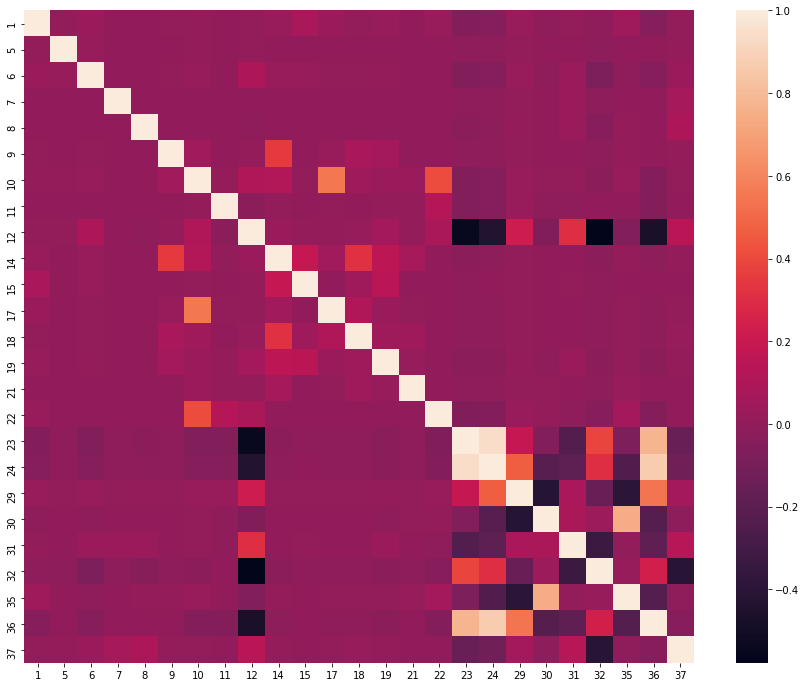

In [ ]:
T_df = T_df[[col for col in T_df if T_df[col].nunique() > 1]]

corr = T_df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [ ]:
T_df[2].replace({'icmp': 0, 'tcp': 1, 'udp' : 2}, inplace=True)
T_df[3].replace({'http':1, 'smtp':2, 'domain_u':3, 'auth':4, 'finger':5, 'telnet':6, 'eco_i':7,
               'ftp':8, 'ntp_u':9, 'ecr_i':10, 'other':11, 'urp_i':12, 'private':13, 'pop_3':14,
               'ftp_data':15, 'netstat':16, 'daytime':17, 'ssh':18, 'echo':19, 'time':20,
               'name':21,'whois':22, 'domain':23, 'mtp':24, 'gopher':25, 'remote_job':26, 
               'rje':17, 'ctf':28,'supdup':29, 'link':30, 'systat':31, 'discard':32, 'X11':33, 
               'shell':34, 'login':35,'imap4':36, 'nntp':37, 'uucp':38, 'pm_dump':39, 'IRC':40, 
               'Z39_50':41, 'netbios_dgm':42,'ldap':43, 'sunrpc':44, 'courier':45, 'exec':46, 
               'bgp':47, 'csnet_ns':48, 'http_443':49,'klogin':50, 'printer':51, 'netbios_ssn':52, 
               'pop_2':53, 'nnsp':54, 'efs':55,'hostnames':56, 'uucp_path':57, 'sql_net':58, 
               'vmnet':59, 'iso_tsap':60,'netbios_ns':61, 'kshell':62, 'urh_i':63, 'http_2784':64, 
               'harvest':65, 'aol':66,'tftp_u':67, 'http_8001':68, 'tim_i':69, 'icmp':190}, inplace=True)
T_df[4].replace({'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'OTH':9,
                 'S3':10}, inplace=True)

In [ ]:
T_df.shape
T_df.head()

(311028, 28)

,1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,19,21,22,23,24,29,30,31,32,35,36,37
0,0,2,13,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,0.0,0.0,255,0.01,0.00,0.0
1,0,2,13,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,0.0,0.0,255,0.01,0.00,0.0
2,0,2,13,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1.0,0.0,0.0,255,0.01,0.00,0.0
3,0,2,13,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1.0,0.0,0.0,255,0.01,0.01,0.0
4,0,2,13,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1.0,0.0,0.0,255,0.00,0.01,0.0


In [ ]:
start_time = time.time()
new_pred_RFC = modelRFC.predict(T_df)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  1.888282060623169


In [ ]:
new_pred_RFC =  np.append(new_pred_RFC,new_pred_RFC[-1:])
DF = pd.DataFrame(new_pred_RFC)
DF.to_csv("testLabel.csv",index=True,header=['target'])